In [1]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from scipy.optimize import minimize as sp_minimize
from scipy import special
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt
import lmfit
import random

In [2]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [3]:
def LF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to LF (0-0.01Hz)in the paper
    """
    LMparams = Parameters()

    # The code below is to load the initial paramters if we are running the NLLSR on all 3 components at once

    LMparams.add('A1_FS', value = 10.)
    LMparams.add('A2_FS', value = 10.)
    LMparams.add('A3_FS', value = 10.)
    LMparams.add('w1_FS', value = 0, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w2_FS', value = 0.005*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w3_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # The code below is to load the initial paramters if we are running the NLLSR on one component at a time

    # if component == 1:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.005*2*math.pi, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def MF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to MF (0.01-0.25Hz) in the paper
    """
    LMparams = Parameters()

    # The code below is to load the initial paramters if we are running the NLLSR on all 3 components at once

    LMparams.add('A1_FS', value = 10.)
    LMparams.add('A2_FS', value = 10.)
    LMparams.add('A3_FS', value = 10.)
    LMparams.add('w1_FS', value = 0.02*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w2_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w3_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # The code below is to load the initial paramters if we are running the NLLSR on one component at a time

    # if component == 1:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.02*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def HF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to HF (0.25-0.5Hz) in the paper
    """
    LMparams = Parameters()

    # The code below is to load the initial paramters if we are running the NLLSR on all 3 components at once

    LMparams.add('A1_FS', value = 1.)
    LMparams.add('A2_FS', value = 1.)
    LMparams.add('A3_FS', value = 1.)
    LMparams.add('w1_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w2_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w3_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # The code below is to load the initial paramters if we are running the NLLSR on one component at a time

    # if component == 1:
    #     LMparams.add('A_FS', value = 1.)
    #     LMparams.add('w_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 1.)
    #     LMparams.add('w_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 1.)
    #     LMparams.add('w_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

In [ ]:
random.seed(10)
random_no = random.random()
print(round(random_no,3))
random_no = random.random()
print(random_no)

np.random.seed(10)
list1 = np.random.rand(5).tolist()
random_numbers = [round(element, 2) for element in list1]
print(random_numbers.pop())
print(random_numbers.pop())
print(random_numbers.pop())
print(random_numbers.pop())
print(random_numbers.pop())

In [168]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self, pulse_duration):
        """ Constructor takes in pulse duration and creates instances of inverse cdfs for each of the intersted parameters needed to
            generate the drive pulse. Creates self.parameter dictionary containing all relevant parameters.
        
        
        """
        self.pulse_duration = pulse_duration 
        self.total_t = np.linspace(0, self.pulse_duration, (1000*self.pulse_duration)+1)
        self.accel_inv_cdf_obj = self.create_inv_cdf_objects(Acceleration())
        self.cruising_duration_inv_cdf_obj = self.create_inv_cdf_objects(Cruising_Duration())
        self.avg_cruising_speed_inv_cdf_obj = self.create_inv_cdf_objects(Average_Crusing_Speed())
        self.decel_inv_cdf_obj = self.create_inv_cdf_objects(Deceleration())
        self.random_select_params()
        self.params = self.parameters_for_drive_cycle(self.accel_value, self.decel_value, self.cruising_duration_value, self.avg_cruising_speed_value)
        print(self.params)


    def create_inv_cdf_objects(self, attribute_obj):
        """
        Takes in one of parameter's classes needed for driving pulse and instantiates object for the inverse_cdf
        """
        #load initial gaussian parameters
        param_obj = Gaussian_param()
        #create a probability function object for attribute with its attribute histogram data
        attribute_prob_obj = Probability_Functions(attribute_obj.bins, attribute_obj.data_points,2)
        #fit the histogram
        fitted_obj = attribute_prob_obj.NLLSR(param_obj)
        # create inverse cdf object
        inv_cdf_obj = inv_cdf(attribute_prob_obj)

        return inv_cdf_obj

    def random_select_params(self, seed = 10):
        """
        Randomly generates numbers from 0 to 1 to randomly select values for parameters using their inverse cdf
        """
        np.random.seed(seed)
        list1 = np.random.rand(4).tolist()
        random_numbers = [round(element, 2) for element in list1]
        self.accel_value = self.accel_inv_cdf_obj.get_value(random_numbers.pop())[0]
        self.cruising_duration_value = self.cruising_duration_inv_cdf_obj.get_value(random_numbers.pop())[0]
        self.avg_cruising_speed_value = self.avg_cruising_speed_inv_cdf_obj.get_value(random_numbers.pop())[0]
        self.decel_value = self.decel_inv_cdf_obj.get_value(random_numbers.pop())[0]

    def crusing_with_noise(self, time_array, velocity_noise_obj):
        """
        time_array: array of timestamps to compute for corresponding velocity noise using fitted model
        velocity_noise_obj: VN object containing fitted model and respective parameters for 3 freq components
        
        return:: cruising_with_noise set of speed values containing average cruising speed superimposed on velocity noise 
        """
        #resets time to match the specified duration of the driving pulse
        velocity_noise_obj.set_t(time_array)
        #returns velocity noise speed values (y axis)
        velocity_noise = velocity_noise_obj.final_curve()
        #adds velocity noise speed values (y axis) to static cruising speed
        cruising_with_noise =  velocity_noise + self.params["cruising speed"]

        plt.plot(time_array, cruising_with_noise)
        plt.show()
        return cruising_with_noise

    def parameters_for_drive_cycle(self, acceleration, decceleration, cruising_duration, average_cruising_speed):
        """
        accepts as parameters the 4 randomly selected values from the inverse cdfs, computes other parameters and returns
        this as a dictionary
        """
        #computes acceleration time by using average cruising speed as initial speed of cruising duration
        acceleration_time= average_cruising_speed / acceleration
        #computes decceleration time by using average cruising speed as final speed of cruising duration
        decceleration_time = average_cruising_speed / decceleration
        #computes idle time by subtracting all other durations from total pulse duration
        idle_time = self.total_t - acceleration_time - decceleration_time - cruising_duration
        
        #constructs parameters dictionary containing everything needed to generate driving pulse
        parameters = {"acceleration": acceleration,
                      "decceleration" : decceleration,
                      "acceleration duration": round(acceleration_time,3),
                      "decceleration duration": round(decceleration_time,3),
                      "cruising duration" : round(cruising_duration,3),
                      "cruising speed" : average_cruising_speed,
                      "idle duration" : idle_time,
                      "total duration": self.total_t
                      }
        return parameters

    def generate_drive_cycle(self, velocity_noise_obj):
        """ Function to be called from outside the class that outputs plot of generated driving pulse
        """
        # Call cruising_with_noise method to return corresponding values (y axis) for cruising
        # Inputs the whole pulse duration as cruise duration therefore extra values are present
        print(self.total_t)
        print(self.params["acceleration duration"])
        print(np.where(self.total_t[:]==self.params["acceleration duration"]))
        print(np.where(self.total_t[:]==self.params["acceleration duration"])[0][0])
        print(self.total_t[np.where(self.total_t[:]==self.params["acceleration duration"])[0][0]:])
        speed_while_cruising_extra_values = self.crusing_with_noise(self.total_t[np.where(self.total_t[:]==self.params["acceleration duration"])[0][0]:], velocity_noise_obj)
        # computes initial cruising speed with velocity noise
        initial_cruising_speed = speed_while_cruising_extra_values[0]
        # computes actual acceleartion duration using the caluclated initial speed
        # no longer is using the estimate of initial= avergae cruising speed as in the parameters_for_drive_cycle method
        self.params["acceleration duration"] = round(initial_cruising_speed / self.params["acceleration"],3)
        print('accel_duration:{}'.format(self.params["acceleration duration"]))
        
        # Retrieves x axis (time steps) and y axis (speed) values during acceleration period
        accel_time_values = self.total_t[:np.where(self.total_t[:]==self.params["acceleration duration"])[0][0]]
        speed_during_acceleration = self.params["acceleration"] * accel_time_values
        current_time = self.params["acceleration duration"]
        
        # Retrieves x axis (time steps) and y axis (speed) values during cruising period
        cruising_time_values = self.total_t[np.where(self.total_t[:]==current_time)[0][0]:np.where(self.total_t[:]==current_time+self.params["cruising duration"])[0][0]]
        speed_during_cruising = speed_while_cruising_extra_values[:np.where(self.total_t[:]==self.params["cruising duration"])[0][0]]
        current_time += self.params["cruising duration"]
        
        # Retrieves x axis (time steps) and y axis (speed) values during decceleration period
        final_cruising_speed = speed_during_cruising[-1]
        print(final_cruising_speed)
        print(self.params["decceleration"])
        self.params["decceleration duration"] = round(final_cruising_speed / self.params["decceleration"],3)
        print(self.params["decceleration duration"])
        end_time = round(current_time+self.params["decceleration duration"],3)
        deccel_time_values = self.total_t[np.where(self.total_t[:]==current_time)[0][0]:np.where(self.total_t[:]==end_time)[0][0]]
        speed_during_decceleration = final_cruising_speed - (self.params["decceleration"] * np.linspace(0.001, self.params["decceleration duration"], int(1000*self.params["decceleration duration"])))
        current_time += self.params["decceleration duration"] 
        current_time = round(current_time,3)
        
        # Retrieves x axis (time steps) and y axis (speed= 0) values during idle_time period
        idle_time_values = self.total_t[np.where(self.total_t[:]==current_time)[0][0]:np.where(self.total_t[:]==self.pulse_duration)[0][0]]                                            
        idle_time = 0 * idle_time_values
        
        # Plot all 4 periods on same plot to visuale driving pulse
        plt.plot(accel_time_values, speed_during_acceleration, 'r')  
        plt.plot(cruising_time_values, speed_during_cruising, 'b') 
        plt.plot(deccel_time_values, speed_during_decceleration, 'g') 
        plt.plot(idle_time_values, idle_time, 'r')
        plt.show()


In [31]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-31-a69ee4a596df>, line 5)

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


In [34]:
class Acceleration(object):
    def __init__(self):
        # self.bins = pd.DataFrame([0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
        # self.data_points = pd.DataFrame([1,4,12,24,20,29,9,1,0,0])
        self.bins = pd.DataFrame(np.linspace(0.1, 2.098, num=1000))
        self.data_points = pd.DataFrame(np.repeat([1,4,12,24,20,29,9,1,0,0],100))

In [35]:
class Cruising_Duration(object):
    def __init__(self):
        # self.bins = pd.DataFrame([0,12,24,36,48,60,72,84,96,108,120])
        # data_points = pd.DataFrame([3,14,28,26,12,7,2,4,3,0,1])
        self.bins = pd.DataFrame(np.linspace(-6, 125.88, num=1100))
        self.data_points = pd.DataFrame(np.repeat([3,14,28,26,12,7,2,4,3,0,1],100))

In [36]:
class Average_Crusing_Speed(object):
    def __init__(self):
        # self.bins = pd.DataFrame([2,4,6,8,10,12,14,16,18,20])
        # self.data_points = pd.DataFrame([0,1,2,6,18,35,22,11,4,1])
        self.bins = pd.DataFrame(np.linspace(1, 20.98, num=1000))
        self.data_points = pd.DataFrame(np.repeat([0,1,2,6,18,35,22,11,4,1],100))

In [37]:
class Deceleration(object):
    def __init__(self):
        # self.bins = pd.DataFrame([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
        # self.data_points = pd.DataFrame([0,0,6,14,22,20,16,13,6,3])
        self.bins = pd.DataFrame(np.linspace(-0.25, 4.745, num=1000))
        self.data_points = pd.DataFrame(np.repeat([0,0,6,14,22,20,16,13,6,3],100))        

In [38]:
def Gaussian_param():
    """ Inital parameters for each Gaussian characteristic paramter 
    """
    LMparams = Parameters()
    # there are two sets of values because the paper used 2 curve (n=2) to fit the distributions
    LMparams.add('alpha_1', value = 1., min = 0)
    LMparams.add('alpha_2', value = 1., min = 0)
    LMparams.add('sigma_1', value = 1., min = 0)
    LMparams.add('sigma_2', value = 1., min = 0)
    LMparams.add('meu_1', value = 1., min = 0)
    LMparams.add('meu_2', value = 1., min = 0)

    return LMparams

In [39]:
class Probability_Functions(object):
    def __init__(self, x, y, n):
        self.x = x
        self.y = y
        self.original_y = y
        # the number of Gaussian distribution used to describe the data
        self.n = n

    def single_component(self, alpha_i, sigma_i, meu_i):
        """ Returns the single Gaussian component as described in the sum of eqn (10)
        """
        exp_component = -((self.x - meu_i)**2)/(2*(sigma_i**2))
        fcn = (alpha_i/(sigma_i*math.sqrt(2*math.pi)))*np.exp(exp_component)
        return fcn

    def eqn_model(self, params):
        """ Returns the Gaussian component sum as described in eqn (10)
        """
        # runs a loop for the number of of Gaussian distibutions used to describe the data, and sums the single components 
        for component in range(1,self.n+1):
            alpha_i = 'alpha_'+str(component)
            sigma_i = 'sigma_'+str(component)
            meu_i = 'meu_'+str(component)
            if component == 1:
                model = self.single_component(params[alpha_i],params[sigma_i],params[meu_i])
            else:
                model += self.single_component(params[alpha_i],params[sigma_i],params[meu_i])

        return model

    def fnc2min(self, params):
        """ Returns the residuals for eqn_model
        """
        return (self.y - self.eqn_model(params))

    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        # uses least swuares method to minimize the parameters given by LMparams according to the residuals given by self.fnc2min
        LMFitmin = Minimizer(self.fnc2min, LMparams)
        LMFitResult = LMFitmin.minimize(method='least_squares')
        lmfit.printfuncs.report_fit(LMFitResult.params)
        self.params = LMFitResult.params

        return LMFitResult

    def single_cdf_component(self, x, alpha_i, sigma_i, meu_i):
        """ Returns the single cdf component as described in the sum of eqn (12)
        """
        erf_param = (x - meu_i)/(sigma_i * math.sqrt(2))
        answer =  0.5 * alpha_i * (1 + special.erf(erf_param))

        return answer

    def cdf(self, x, params):
        """ Returns the cdf component sum as described in eqn (12)
        """
        for component in range(1,self.n+1):
            alpha_i = 'alpha_'+str(component)
            sigma_i = 'sigma_'+str(component)
            meu_i ='meu_'+str(component)

            if component == 1:
                answer =  self.single_cdf_component(x, params[alpha_i], params[sigma_i], params[meu_i])
            else:
                answer +=  self.single_cdf_component(x, params[alpha_i], params[sigma_i], params[meu_i])

        return answer

    def normalised_cdf(self,x, LMparams):
        """ Returns a normalised cdf as described in eqn (13)
        """
        lim_inf_cdf = self.cdf(math.inf, LMparams)
        answer = self.cdf(x, LMparams)/lim_inf_cdf

        return answer

    def normalised_single_cdf(self,x, alpha_i, sigma_i, meu_i):
        """ normalised cdf for a SINGLE component 
        """
        lim_inf_cdf = self.single_cdf_component(math.inf, alpha_i, sigma_i, meu_i)
        answer = self.single_cdf_component(x, alpha_i, sigma_i, meu_i)/lim_inf_cdf

        return answer

    def single_quantile_component(self, p, alpha_i, sigma_i, meu_i):
        """ single inverse cdf component
        """
        inv_erf_param = (2*p/alpha_i) - 1
        answer =  meu_i + (sigma_i * math.sqrt(2) * special.erfinv(inv_erf_param))

        return answer

    

In [40]:
class inv_cdf(object):
    def __init__(self, prob_obj):
        # create a numpy array ranging from 0 to 1 with granularity of e-3
        # the array represents the possible p values that could be input to determine the attribute value, therefore
        # granularity of the random number generator needs to be set to e-3
        self.x = np.arange(0,1.001,0.001)
        # genenrate an empty array with same shape as self.x
        self.y = np.zeros(self.x.shape)
        # save a local version of the probability object
        self.prob_obj = prob_obj
        # generate the lookup table for the ranges of x
        self.fit()

    def diff(self, x, a):
        """ residual(?) for the fit method
        """
        yt = self.prob_obj.normalised_cdf(x, self.prob_obj.params)
        return (yt - a )**2

    def fit(self):
        """ Fits the inverse normalised cdf and generates a lookup table of sort
        """
        # the for loop generates a lookup table correlating x and y based on the normalised cdf
        for idx,x_value in enumerate(self.x):
            res = sp_minimize(self.diff, 1.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
            self.y[idx] = res.x[0]

    def get_value(self, p):
        """ Gives corresponding attribute value depending on p (ranging from 0 to 1)
        """
        x_copy = np.copy(self.x)
        # find the index at which the x is equal to the input p
        index = np.where(x_copy == p)
        # gets the corresponding attribute value depending on the index
        value = self.y[index]

        return value


In [ ]:
#create object storing histogram datapoints
accel_obj = Acceleration()
print(accel_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for acceleration with its acceleration histogram data
accel_prob_obj = Probability_Functions(accel_obj.bins, accel_obj.data_points,2)
#fit the histogram
hey = accel_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(accel_prob_obj.x,accel_prob_obj.original_y,'b')
yy = accel_prob_obj.eqn_model(hey.params)
gaus_1 = accel_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = accel_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(accel_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(accel_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(accel_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

print(accel_prob_obj.cdf(0.8, hey.params))

In [ ]:
x = 0.33
erf_param = (x - 0.83011822)/(0.21988047 * math.sqrt(2))
print(erf_param)
answer =  12.5916156 * (1 + special.erf(erf_param))
print(answer)

x = math.inf
erf_param = (x - 0.83011822)/(0.21988047 * math.sqrt(2))
print(erf_param)
lim =  12.5916156 * (1 + special.erf(erf_param))
print(answer/lim)


x = np.linspace(0,2,1000)
#plot the cdf of the sum of gaussian
lim_inf_cdf = accel_prob_obj.cdf(math.inf, hey.params)
yy = accel_prob_obj.normalised_cdf(x,hey.params)
cdf_1 = accel_prob_obj.single_cdf_component(x,hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])/lim_inf_cdf
cdf_2 = accel_prob_obj.single_cdf_component(x,hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])/lim_inf_cdf
plt.plot(yy,x,'r', label = 'best_fit')
plt.plot(cdf_1,x,'g', label = 'cdf_1')
plt.plot(cdf_2,x,'y', label = 'cdf_2')
plt.legend(loc='best')
# plt.show()

inv_cdf_obj = inv_cdf(accel_prob_obj)
print(inv_cdf_obj.get_value(0))

print(accel_prob_obj.normalised_cdf(0.718,hey.params))

# q_1 = accel_prob_obj.single_quantile_component(x*lim_inf_cdf,hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
# q_2 = accel_prob_obj.single_quantile_component(x*lim_inf_cdf,hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])

plt.plot(inv_cdf_obj.x,inv_cdf_obj.y,  label = 'minimized')
# plt.plot(x,q_1,label = 'idk_1')
# plt.plot(x,q_2,label = 'idk_2')
plt.title(r'$f^{-1}(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
# # plt.savefig("function_inverse.png", bbox_inches='tight')

plt.show()

In [ ]:
#create object storing histogram datapoints
cd_obj = Cruising_Duration()
print(cd_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for acceleration with its acceleration histogram data
cd_prob_obj = Probability_Functions(cd_obj.bins, cd_obj.data_points,2)
#fit the histogram
hey = cd_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(cd_prob_obj.x,cd_prob_obj.original_y,'b')
yy = cd_prob_obj.eqn_model(hey.params)
gaus_1 = cd_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = cd_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(cd_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(cd_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(cd_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

In [ ]:
#create object storing histogram datapoints
avg_cs_obj = Average_Crusing_Speed()
print(avg_cs_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for acceleration with its acceleration histogram data
avg_cs_prob_obj = Probability_Functions(avg_cs_obj.bins, avg_cs_obj.data_points,2)
#fit the histogram
hey = avg_cs_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(avg_cs_prob_obj.x,avg_cs_prob_obj.original_y,'b')
yy = avg_cs_prob_obj.eqn_model(hey.params)
gaus_1 = avg_cs_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = avg_cs_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(avg_cs_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(avg_cs_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(avg_cs_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

In [ ]:
#create object storing histogram datapoints
decel_obj = Deceleration()
print(decel_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for deceleration with its deceleration histogram data
decel_prob_obj = Probability_Functions(decel_obj.bins, decel_obj.data_points,2)
#fit the histogram
hey = decel_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(decel_prob_obj.x,decel_prob_obj.original_y,'b')
yy = decel_prob_obj.eqn_model(hey.params)
gaus_1 = decel_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = decel_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(decel_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(decel_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(decel_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

In [41]:
class Velocity_Noise(object):
    def __init__(self,t,y):
        self.t = t
        self.y = y
        self.original_y = y
        self.original_y_mean = self.original_y.mean()

    def set_t(self, t):
        """Set t values
        """
        self.t = t

    def subtract_avg(self):
        """Removes the average speed from the observations
        """
        self.y = self.y - self.original_y_mean
        return self.y

    def subtract(self, array):
        self.y = self.y - array
        return self.y

    def single_component(self, A_i_FS, w_i_FS, phi_i_FS):
        """ Returns a single velocity noise component as described in the sum of eqn (5)
        """
        return A_i_FS * np.sin( (w_i_FS*self.t) + phi_i_FS )
     
    def eqn_model(self, params):
        """ Returns the velocity noise FS model as described in eqn (5)
        """
        # put all the paramters in a list
        A_FS = [params['A1_FS'],params['A2_FS'],params['A3_FS']]
        w_FS = [params['w1_FS'],params['w2_FS'],params['w3_FS']]
        phi_FS = [params['phi1_FS'],params['phi2_FS'],params['phi3_FS']]

        # equation (5), sum of 3 components
        model = self.single_component(A_FS[0],w_FS[0], phi_FS[0])
        model += self.single_component(A_FS[1],w_FS[1], phi_FS[1])
        model += self.single_component(A_FS[2],w_FS[2], phi_FS[2])

        return model

    def final_curve(self):
        """ Returns the final fitted curve
        """
        final = self.eqn_model(self.LF_params.params)
        final += self.eqn_model(self.MF_params.params)
        final += self.eqn_model(self.HF_params.params)

        return final

    def fit_all(self, LF_param = LF_Noise(), MF_param = MF_Noise(), HF_param = HF_Noise()):
        """ Fits the velicoty noise for all FS components
        """
        self.LF_fit(LF_param)
        self.subtract(self.eqn_model(self.LF_params.params))
        self.MF_fit(MF_param)
        self.subtract(self.eqn_model(self.MF_params.params))
        self.HF_fit(HF_param)

    def LF_fit(self, init_params = LF_Noise()):
        """ Fits and returns the component parameters for LF noise
        """
        self.LF_params = self.NLLSR(init_params)

        return self.LF_params
    
    def MF_fit(self, init_params = MF_Noise()):
        """ Fits and returns the component parameters for HF noise
        """
        self.MF_params = self.NLLSR(init_params)

        return self.MF_params

    def HF_fit(self, init_params = HF_Noise()):
        """ Fits and returns the component parameters for HF noise
        """
        self.HF_params = self.NLLSR(init_params)

        return self.HF_params

    def fnc2min(self, params):
        """ Returns the residuals (eqn 7) for the model for when running all 3 components at once
        """
        return (self.y - self.eqn_model(params))

    # def fnc2min(self, params):
    #     """ Returns the residuals (eqn 7) for the model for when running one component at a time
    #     """
    #     return (self.y - self.single_component(params['A_FS'], params['w_FS'], params['phi_FS']))


    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        # uses least swuares method to minimize the parameters given by LMparams according to the residuals given by self.fnc2min
        LMFitmin = Minimizer(self.fnc2min, LMparams)
        LMFitResult = LMFitmin.minimize(method='least_squares')
        lmfit.printfuncs.report_fit(LMFitResult.params)

        return LMFitResult

In [170]:
if __name__ == '__main__':
    
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    # show the slice of data
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values and convert to m/s
    y = cruising_data.loc[:,'speed_mph'].to_numpy()/2.237

    # interpolate linearly and make timesteps finer (0.001s)
    from scipy.interpolate import interp1d
    f = interp1d(t, y)
    t = np.linspace(1,len(cruising_data),1000*len(cruising_data))
    y = f(t)

    # initialise the DP object
    vn_obj = Velocity_Noise(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = vn_obj.subtract_avg()

    original_y = y
    
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.fit_all()
    yy = vn_obj.final_curve()
    
    driving_pulse = DP(pulse_duration=50)
    
    plt.plot(t,y,'b')
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()


    driving_pulse.generate_drive_cycle(vn_obj)



SyntaxError: invalid syntax (<ipython-input-170-8f388482e8e3>, line 48)

# The code below is for when we are balancing all 3 components of a Frequency Spectrum (FS) at ONCE
## Each block corresponds to one FS

/Users/koeboonshyang/Documents/GitHub/MEng-V2I


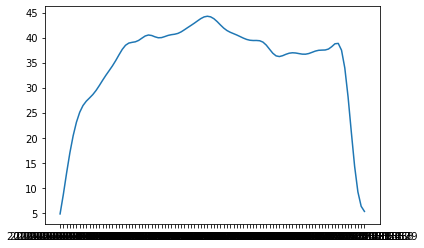

/Users/koeboonshyang/opt/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:850: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
/Users/koeboonshyang/opt/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:857: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))
[[Variables]]
    A1_FS:   -290.287257 +/-        nan (nan%) (init = 10)
    A2_FS:   -465.054092 +/-        nan (nan%) (init = 10)
    A3_FS:    284.192793 +/-        nan (nan%) (init = 10)
    w1_FS:    0.02464318 +/-        nan (nan%) (init = 0)
    w2_FS:    0.05291596 +/-        nan (nan%) (init = 0.03141593)
    w3_FS:    0.06283185 +/-        nan (nan%) (init = 0.06283185)
    phi1_FS: -0.81487196 +/-        nan (nan%) (init = 0)
    phi2_FS:  1.38781621 +/-        nan (nan%) (init = 0)
    phi3_FS:  1.05616405 +/-        nan (nan%) (init = 0)


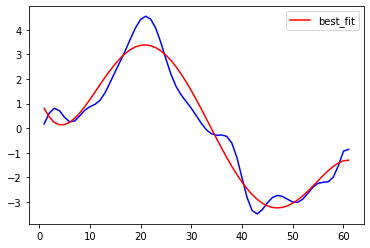

In [164]:
if __name__ == '__main__':
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    # show the slice of data
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    vn_obj = Velocity_Noise(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = vn_obj.subtract_avg()

    original_y = y
 
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.LF_fit()
    plt.plot(t,y,'b')

    yy = hi.params['A1_FS'] * np.sin( (hi.params['w1_FS']*t) + hi.params['phi1_FS'])
    yy = yy + hi.params['A2_FS'] * np.sin( (hi.params['w2_FS']*t) + hi.params['phi2_FS'])
    yy = yy + hi.params['A3_FS'] * np.sin( (hi.params['w3_FS']*t) + hi.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed = yy


[[Variables]]
    A1_FS:   -0.62023250 +/- 0.67518645 (108.86%) (init = 10)
    A2_FS:   -36.6681574 +/- 1022890.66 (2789588.38%) (init = 10)
    A3_FS:    36.6485487 +/- 1022890.75 (2791081.19%) (init = 10)
    w1_FS:    0.39746826 +/- 0.04908600 (12.35%) (init = 0.1256637)
    w2_FS:    0.30113868 +/- 6.08931264 (2022.10%) (init = 0.1884956)
    w3_FS:    0.30070132 +/- 6.11524346 (2033.66%) (init = 0.1884956)
    phi1_FS: -3.14159265 +/- 1.56595033 (49.85%) (init = 0)
    phi2_FS: -3.14159262 +/- 46.2299063 (1471.54%) (init = 0)
    phi3_FS: -3.13821776 +/- 48.2840036 (1538.58%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A2_FS, A3_FS)     = -1.000
    C(A2_FS, w3_FS)     = -1.000
    C(A3_FS, w3_FS)     =  1.000
    C(A3_FS, w2_FS)     = -1.000
    C(A2_FS, w2_FS)     =  1.000
    C(w2_FS, w3_FS)     = -1.000
    C(w3_FS, phi3_FS)   = -0.997
    C(w2_FS, phi2_FS)   = -0.997
    C(A2_FS, phi3_FS)   =  0.997
    C(A3_FS, phi3_FS)   = -0.997
    C(A3_FS, ph

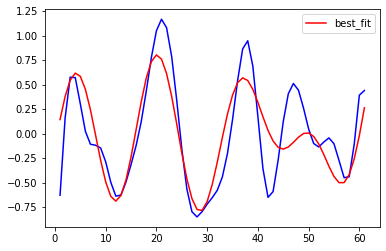

In [165]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi2 = vn_obj.MF_fit()

    plt.plot(t,y,'b')
    yy = hi2.params['A1_FS'] * np.sin( (hi2.params['w1_FS']*t) + hi2.params['phi1_FS'])
    yy = yy + hi2.params['A2_FS'] * np.sin( (hi2.params['w2_FS']*t) + hi2.params['phi2_FS'])
    yy = yy + hi2.params['A3_FS'] * np.sin( (hi2.params['w3_FS']*t) + hi2.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

[[Variables]]
    A1_FS:   -0.03825131 +/- 0.05758983 (150.56%) (init = 1)
    A2_FS:   -0.02493709 +/- 0.05766228 (231.23%) (init = 1)
    A3_FS:    4.27383517 +/- 1545018.27 (36150628.37%) (init = 1)
    w1_FS:    1.57079633 +/- 0.08583951 (5.46%) (init = 1.570796)
    w2_FS:    2.39391906 +/- 0.13421721 (5.61%) (init = 2.356194)
    w3_FS:    3.14139265 +/- 72.3026453 (2301.61%) (init = 3.141593)
    phi1_FS: -0.79724154 +/- 3.06661739 (384.65%) (init = 0)
    phi2_FS: -1.13041869 +/- 4.81596745 (426.03%) (init = 0)
    phi3_FS:  0.00840572 +/- 3038.75896 (36151082.09%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w3_FS, phi3_FS)   = -1.000
    C(A3_FS, phi3_FS)   = -1.000
    C(A3_FS, w3_FS)     =  1.000
    C(w2_FS, phi2_FS)   = -0.876
    C(w1_FS, phi1_FS)   = -0.872
    C(A3_FS, phi2_FS)   = -0.196
    C(phi2_FS, phi3_FS) =  0.196
    C(w3_FS, phi2_FS)   = -0.196
    C(A3_FS, w2_FS)     =  0.171
    C(w2_FS, phi3_FS)   = -0.171
    C(w2_FS, w3_FS)     

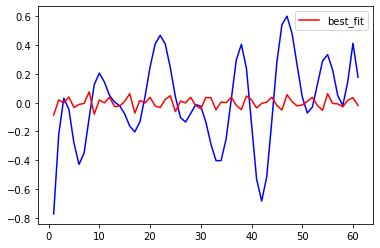

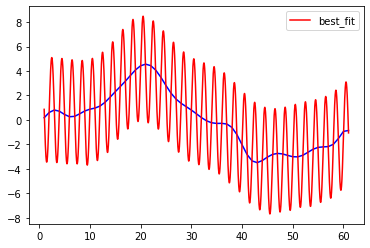

In [166]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi3 = vn_obj.HF_fit()
    plt.plot(t,y,'b')
    yy = hi3.params['A1_FS'] * np.sin( (hi3.params['w1_FS']*t) + hi3.params['phi1_FS'])
    yy = yy + hi3.params['A2_FS'] * np.sin( (hi3.params['w2_FS']*t) + hi3.params['phi2_FS'])
    yy = yy + hi3.params['A3_FS'] * np.sin( (hi3.params['w3_FS']*t) + hi3.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy


    # create a numpy array of just new_t values starting at t=1
    new_t = np.linspace(1,len(cruising_data),1000*len(cruising_data))
    vn_obj.set_t(new_t)

    plt.plot(t,original_y,'b')
    plt.plot(new_t, vn_obj.final_curve(),'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()



# The code below is for when we are running one component at once 
## Each block is for one Frequency Spectrum

In [ ]:
if __name__ == '__main__':
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    vn_obj = Velocity_Noise(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = vn_obj.subtract_avg()

    original_y = y
    
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise(1))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed = yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise(2))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise(3))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy


In [ ]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(MF_Noise(1))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(MF_Noise(2))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(MF_Noise(3))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

In [ ]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(HF_Noise(1))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of HF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(HF_Noise(2))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of HF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(HF_Noise(3))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of HF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    plt.plot(t,original_y,'b')
    plt.plot(t, reconstructed,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
